# Analysis on baseline model scores (Notebook 4/6)

In this notebook,
- I have performed visualisation to check the distribution of scores accorss the dataset
- I have performed correlation tests between ratings and sentiment scores using several methods
- Created sentiment labels based on threshold values
- Creating ground truth labels based on overall ratings
- Assessing the performance by creating confusion matrix
- Performing positive and negative sentiment prediction assessment

Next notebook: `issue-11-as-sentimental-lexicon-opinion-model.ipynb`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import confusion_matrix
from src.nlp_preprocessing import get_sentiment_label

plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
# source: issue-7-as-sentimental-baseline-model.ipynb
df = pd.read_csv('../data/baseline_scored_small_sample.csv')
df.shape

(8998, 17)

In [3]:
df.describe()

,overall,unixReviewTime,vote,sentiment_score
count,8998.000000,8.998000e+03,1713.000000,8998.000000
mean,2.999555,1.439356e+09,9.738471,2.131233
std,1.699695,6.302907e+07,26.193707,10.054942
min,1.000000,1.002586e+09,2.000000,-75.000000
25%,1.000000,1.410307e+09,2.000000,-0.892857
50%,3.000000,1.449619e+09,3.000000,0.529661
75%,5.000000,1.483661e+09,7.000000,3.040541
max,5.000000,1.537834e+09,391.000000,87.500000


# What is the distribution of sentiment scores across the dataset?

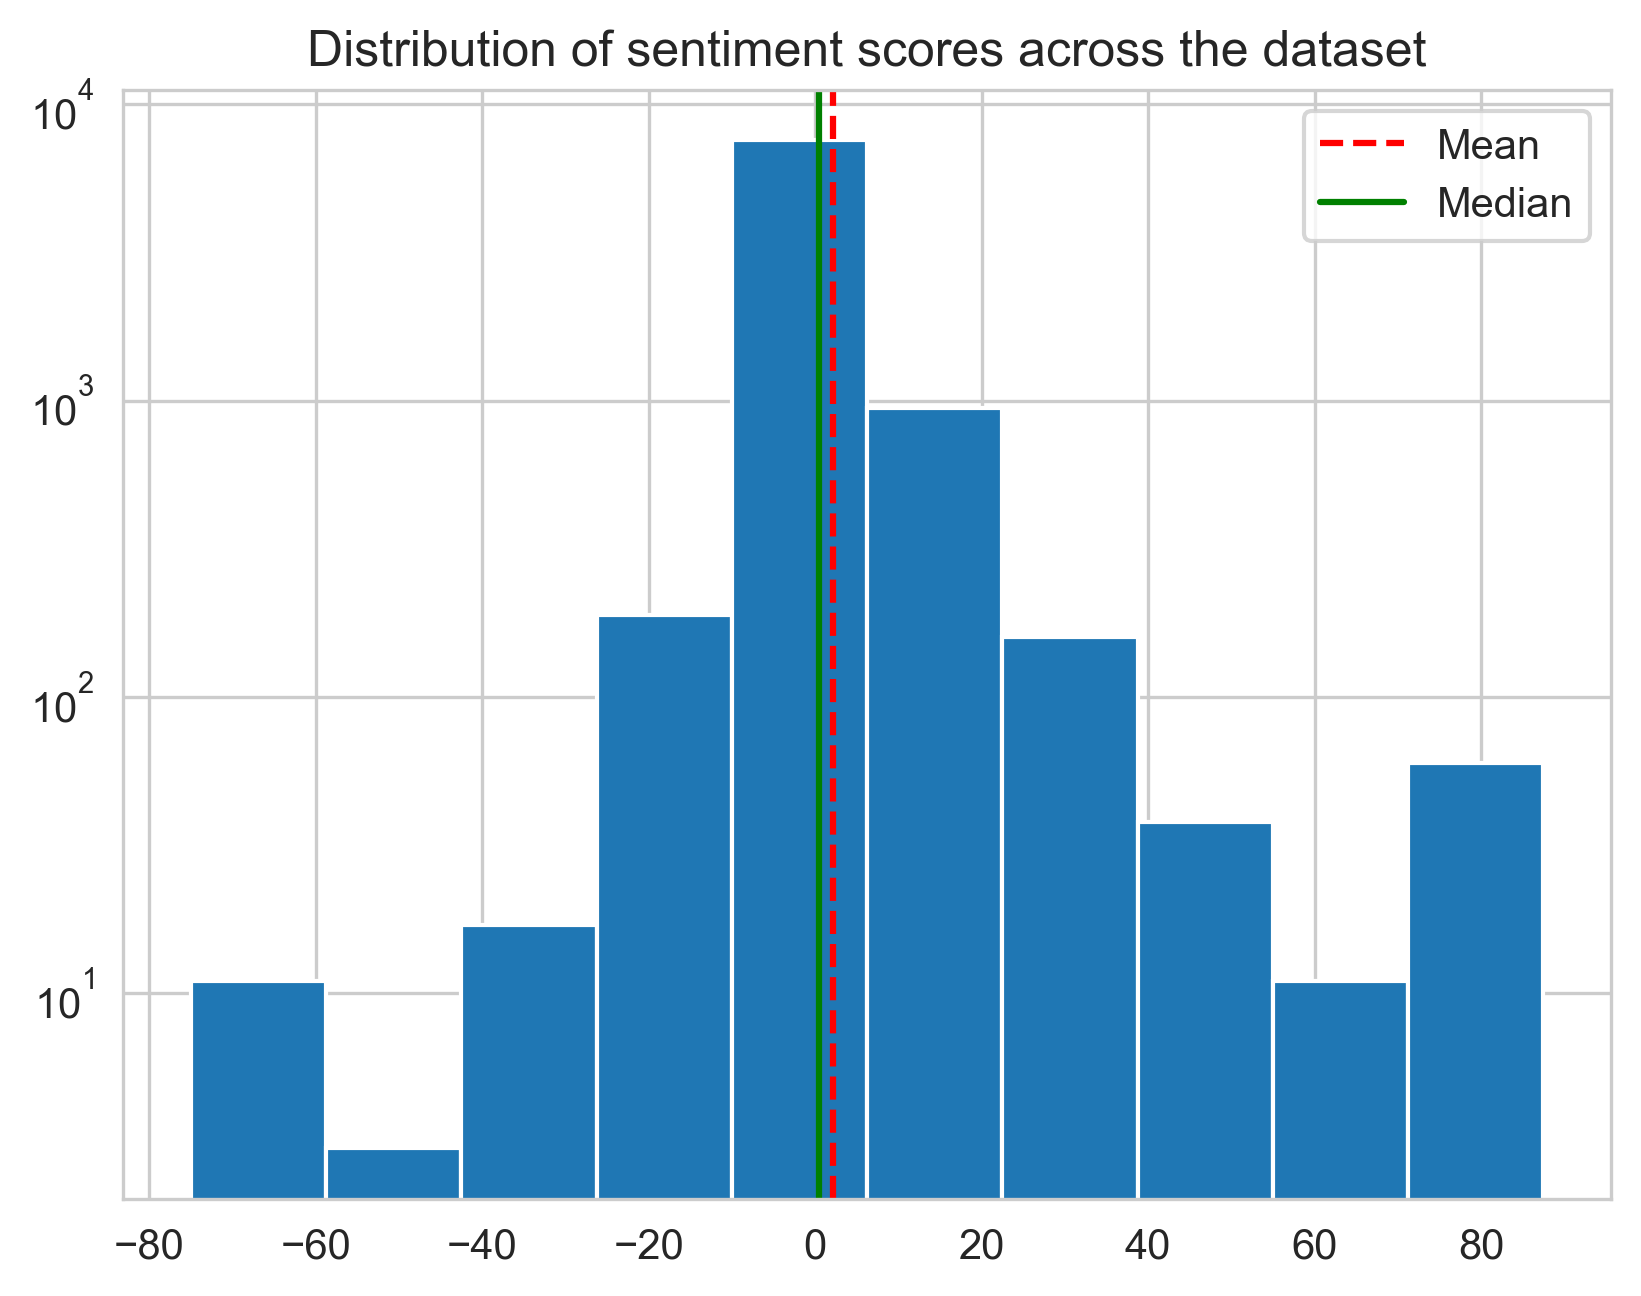

In [4]:
# creating a histogram of the sentiment scores
df['sentiment_score'].hist()
plt.axvline(df['sentiment_score'].mean(), color='r', linestyle='--')
plt.axvline(df['sentiment_score'].median(), color='g', linestyle='-')
plt.legend({'Mean': df['sentiment_score'].mean(), 'Median': df['sentiment_score'].median()})
plt.title('Distribution of sentiment scores across the dataset')
plt.yscale('log')
plt.show()

 a normal distribution with mean and median close to 0 and a wide range of sentiment scores suggests a diverse set of opinions or sentiments expressed in the dataset, ranging from strongly positive to strongly negative, with a balanced distribution around neutral sentiments.

# Correlation Test: Ratings vs Sentiment Scores

In [5]:
# calculating pearson correlation between ratings and sentiment scores
corr_coef, p_value = pearsonr(df['overall'], df['sentiment_score'])
print("Pearson correlation coefficient:", corr_coef)
print("P-value:", p_value)

# calculating spearman correlation between ratings and sentiment scores
corr_coef_spearman, p_value_spearman = spearmanr(df['overall'], df['sentiment_score'])
print("Spearman correlation coefficient:", corr_coef_spearman)
print("P-value (Spearman):", p_value_spearman)

Pearson correlation coefficient: 0.3128022539291719
P-value: 1.920028779219047e-203
Spearman correlation coefficient: 0.4266137593581229
P-value (Spearman): 0.0


- Looking at the Pearson correlation, it shows weak positive correlation and the P-value suggest that it is not statistically significant
- Spearman correlation also suggests that there is weak positive correlation between ratings and sentiment scores

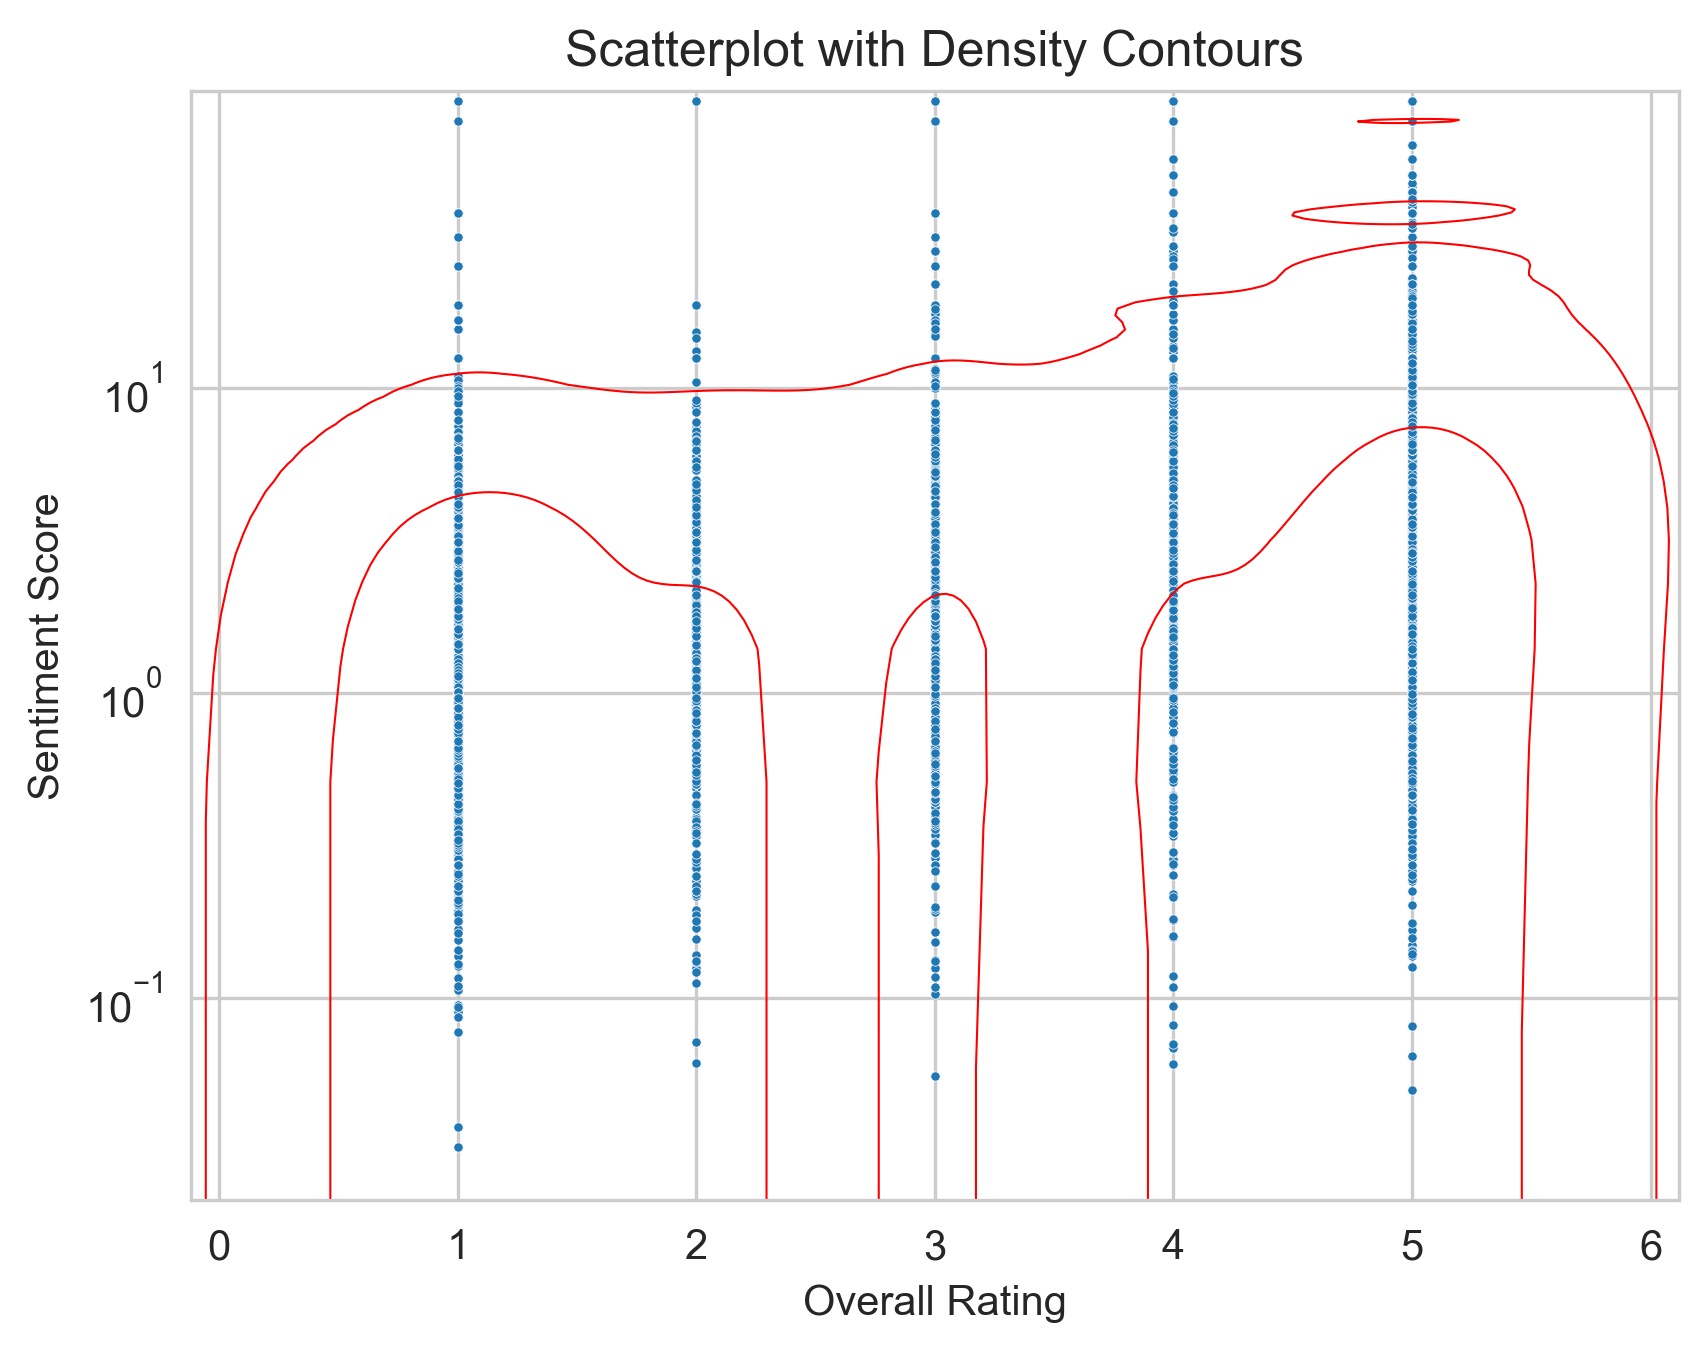

In [6]:
# plotting scatterplot to visualise the correlation
sns.scatterplot(data=df, x ='overall', y = 'sentiment_score', s=5)
sns.kdeplot(data=df, x='overall', y='sentiment_score', levels=3, color='r', linewidths=0.5)
plt.title('Scatterplot with Density Contours')
plt.xlabel('Overall Rating')
plt.ylabel('Sentiment Score')
plt.yscale('log')
plt.show()

We can see a small increase in the sentiment towards positive as the ratings increase, let's investigate the correlation futher

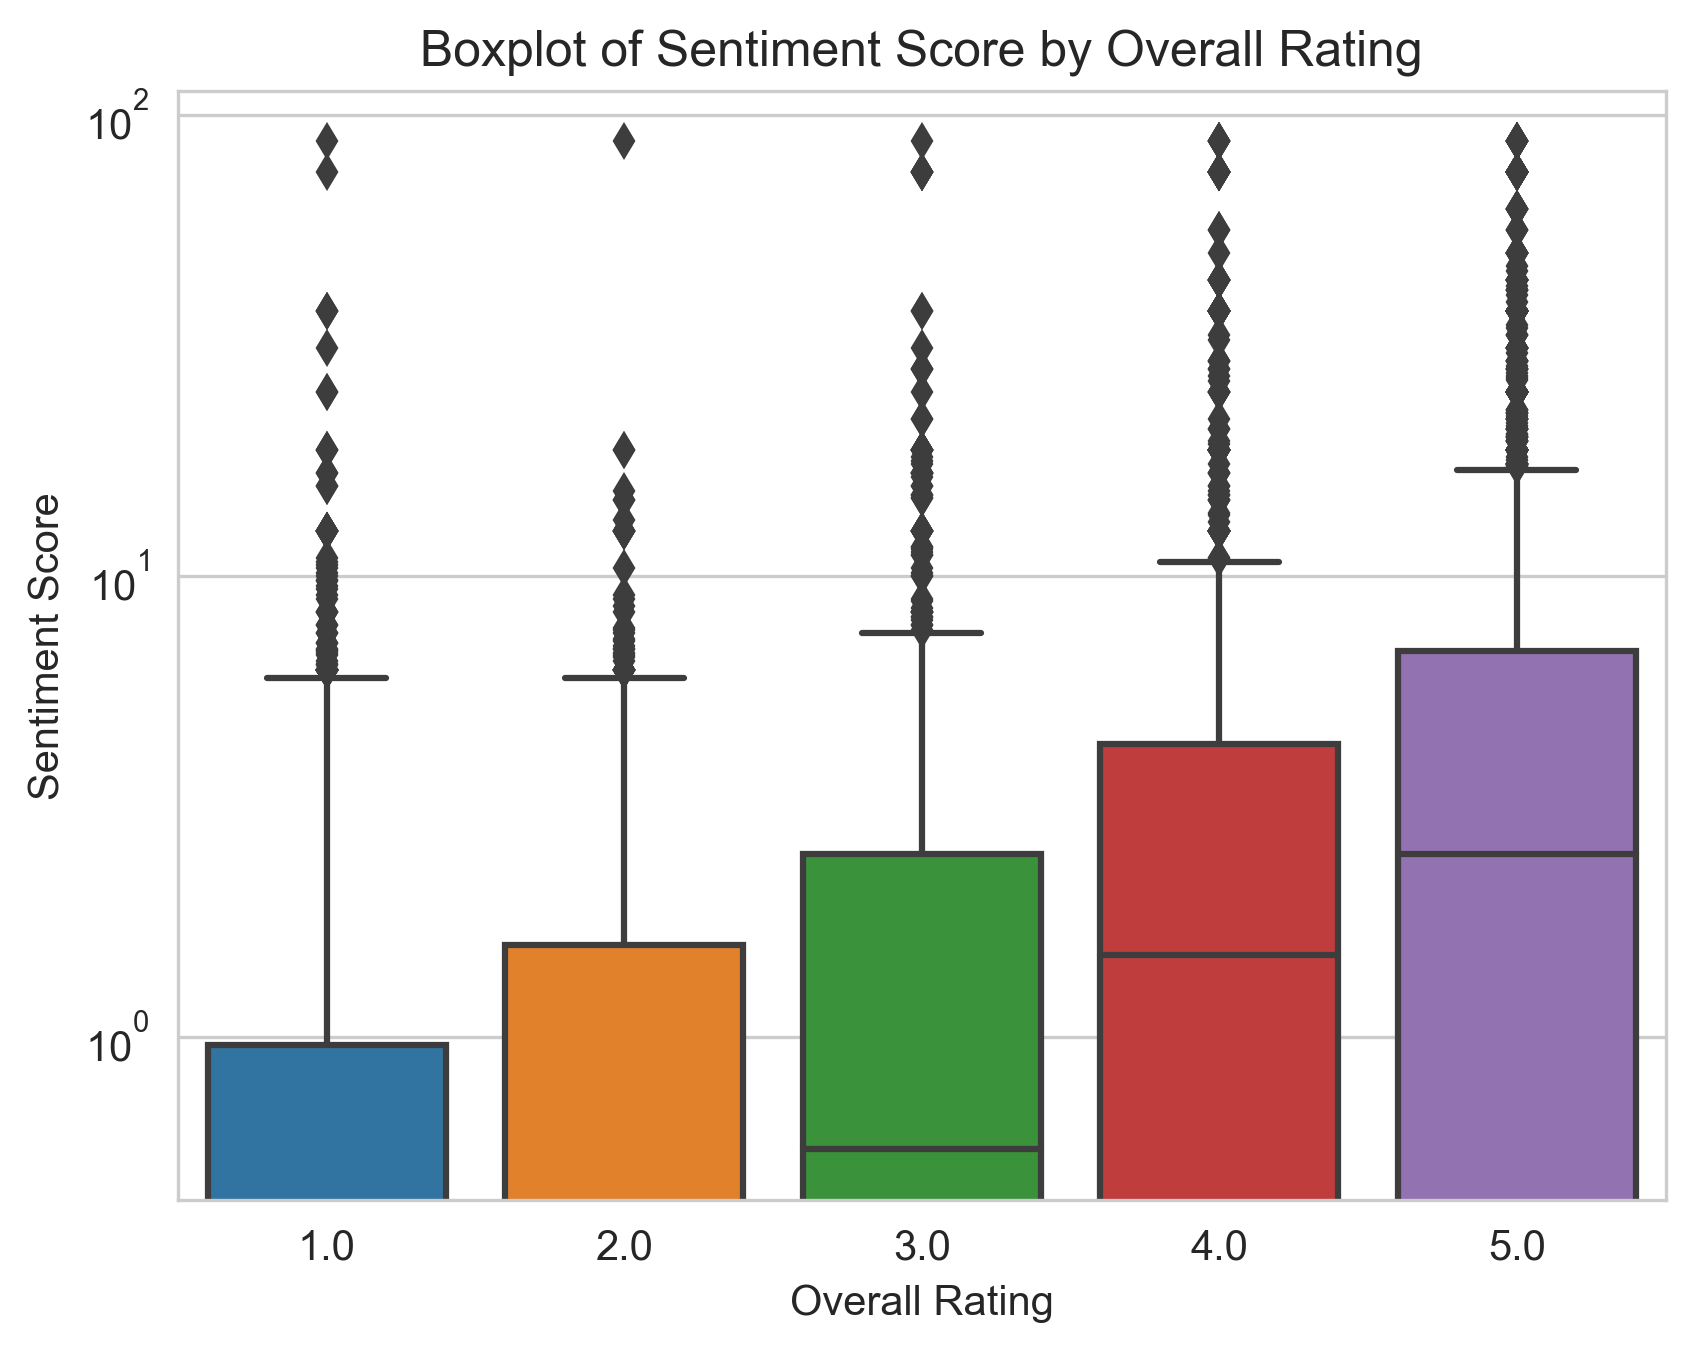

In [7]:
# plotting boxplots for validating if there is an increase in sentiment scores as the ratings increase
sns.boxplot(data=df, x='overall', y='sentiment_score')
plt.xlabel('Overall Rating')
plt.ylabel('Sentiment Score')
plt.title('Boxplot of Sentiment Score by Overall Rating')
plt.yscale('log')

- Here we can clearly see that the median and the upper boundaries have shifted towards more positive sentiment as the ratings increase
-  But it is important to notice the outliers in each and every case where the sentiment score is high

In [8]:
# getting the sentiment labels for each row
# function source: nlp_preprocessing.py 
df['sentiment_labels'] = df['sentiment_score'].apply(get_sentiment_label)

In [9]:
df[['cleaned_review','sentiment_score','sentiment_labels']].sample(5)

,cleaned_review,sentiment_score,sentiment_labels
6204,exactly what was expected,6.250000,positive
3042,you would think that this is a fairly good tape gun sorry to say its not the spring that holds the tape to the roller is far to strong and hardly lets the tape out its also very sharp and continually cuts the tape in mid pull so you cant complete the taping process,2.546296,positive
4986,this mat is much softer than it appears in the photos it arrived rolled up and i could not immediately tell from the photographs that this was not one long piece of wood it also arrived with a few small dents even though the outside of the packaging had not been damaged\n\nafter two months of use its held up fairly well but there are some marks in it from where ive rolled my chair over it i wouldnt have expected an office mat to start showing wear so quickly\n\noverall it looks nice in my office and it does the trick but im not optimistic that this will be a longlasting purchase,-1.659292,negative
1380,it doesnt work wellwhen you put paper you have to try it many time to punch it you should spend many time and there is much probability that the paper is punched unevenly,1.893939,positive
3149,poorly made wire came unattached\nnot something i would buy again\nfast shipping however packaging excellent,-10.937500,negative


In [10]:
# getting the value count for each label bucket
df['sentiment_labels'].value_counts()

sentiment_labels
positive    3968
neutral     2873
negative    2157
Name: count, dtype: int64

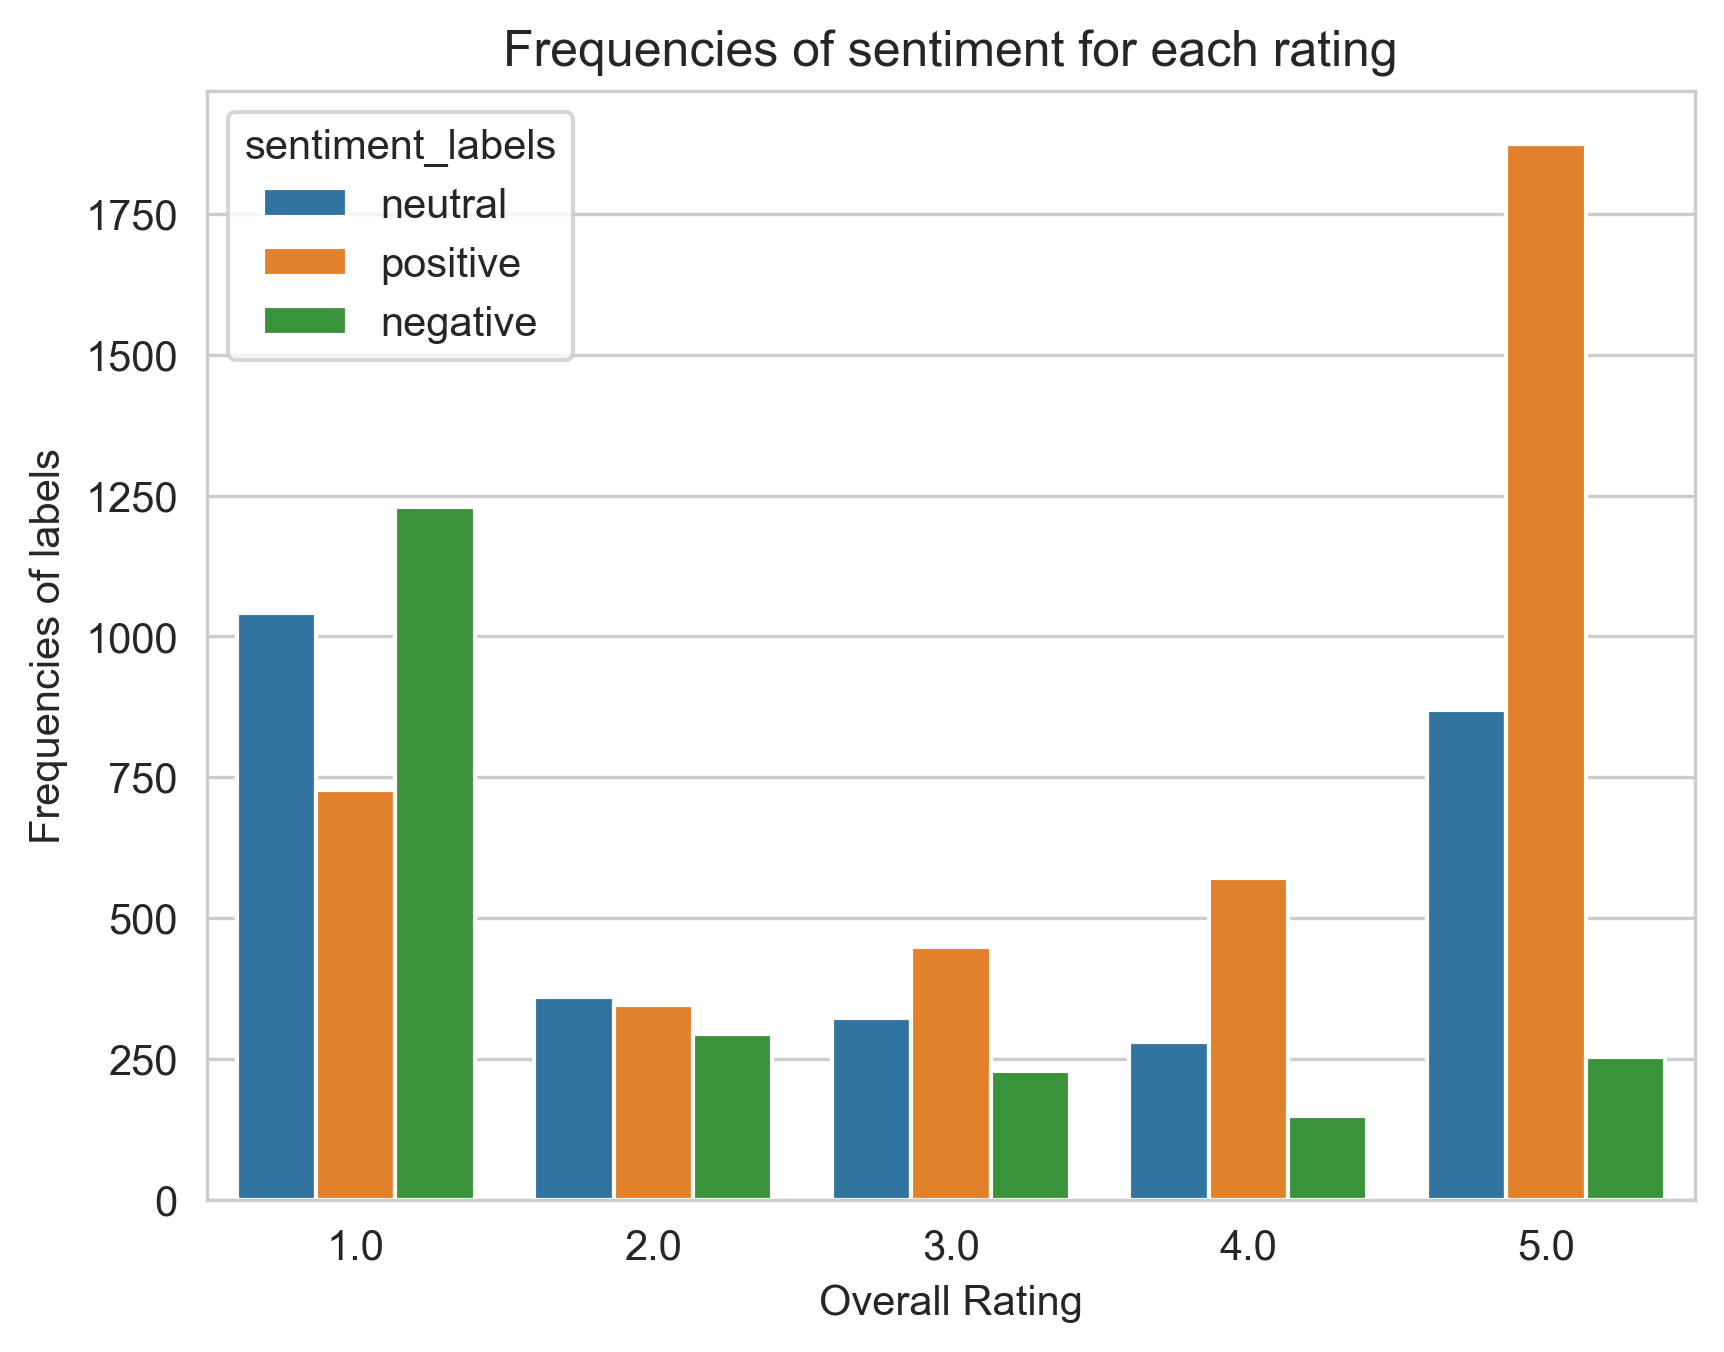

In [14]:
sns.countplot(x='overall', hue='sentiment_labels', data=df)
plt.title('Frequencies of sentiment for each rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequencies of labels')
plt.show()

- Higher ratings tend to have more positive reviews
- Lower ratings have a lot of negative or neutral ratings

In [18]:
df['true_sentiment'] = df['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))
df[['overall','true_sentiment']].sample(5)

,overall,true_sentiment
6490,5.0,positive
4086,3.0,neutral
3819,2.0,negative
1525,1.0,negative
6756,5.0,positive


# Performance Assesment

In [20]:
# creating an actual vs predicted dataset
y_pred, y_true = df['sentiment_labels'].tolist(), df['true_sentiment'].tolist()

In [23]:
len(y_pred), len(y_true)

(8998, 8998)

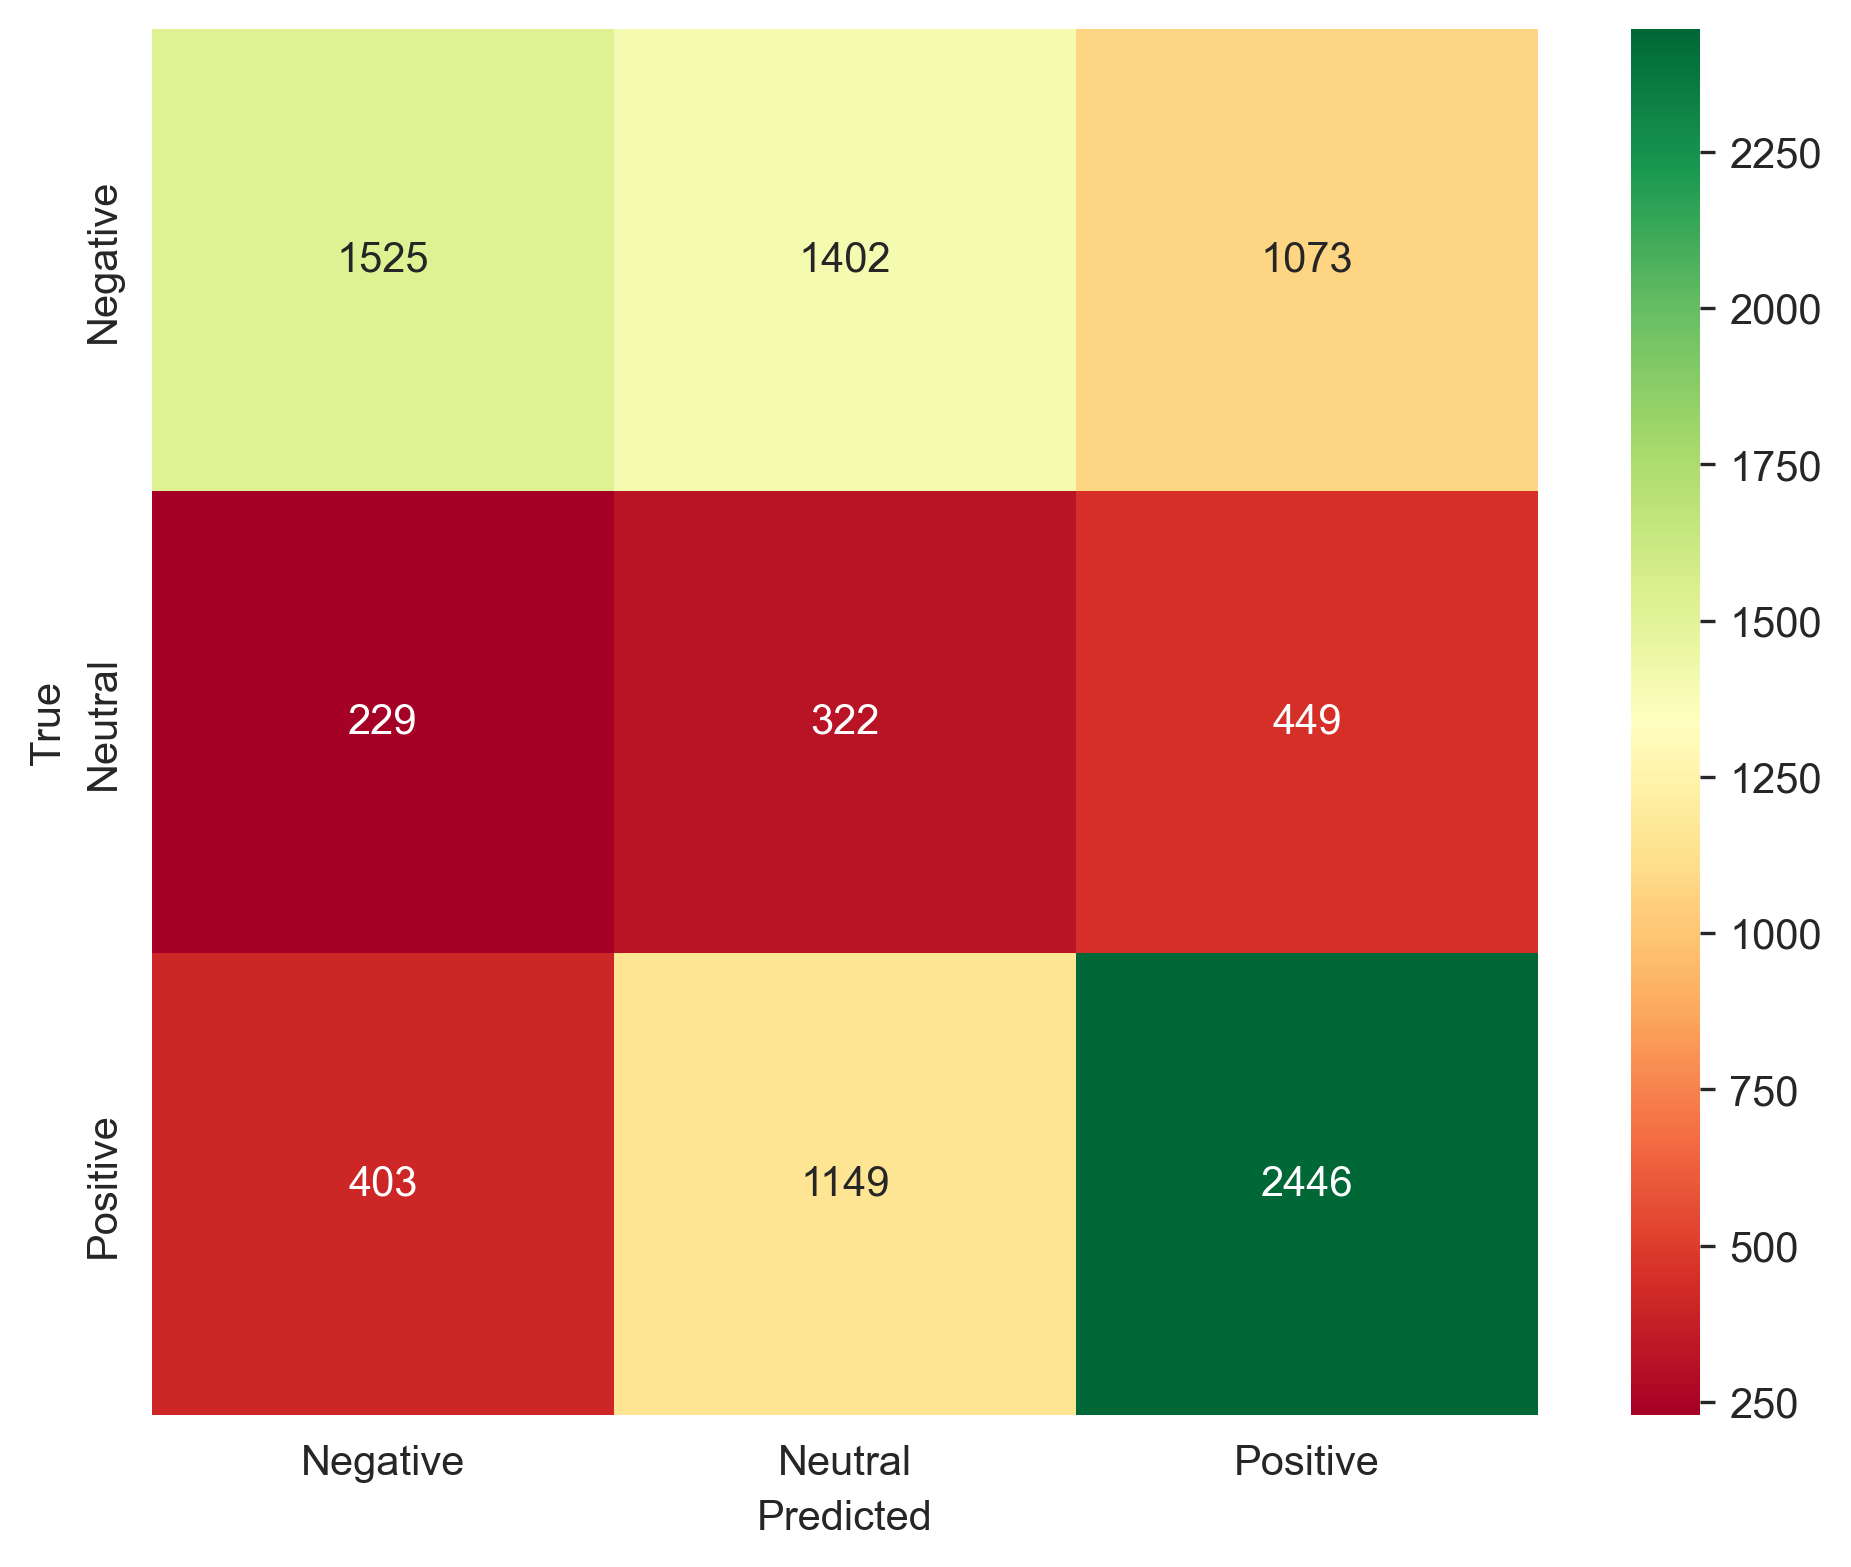

In [33]:
cm = confusion_matrix(y_true, y_pred)
class_labels = ['Negative', 'Neutral', 'Positive']
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(cm, cmap='RdYlGn', annot=True, fmt='d', square=True, ax=ax)
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.show()

## Negative Sentiment Prediction Assessment

In [38]:
tp = 1525
tn = 322+449+1149+2446
fp = 1402+1073
fn = 229+403

recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("Negative Sentiment Prediction Assessment\nRecall: {}\nPrecission: {}\nF1-score: {}".format(recall, precision, f1))

Negative Sentiment Prediction Assessment
Recall: 0.7070004636068614
Precission: 0.38125
F1-score: 0.49537112229982133


## Positive Sentiment Prediction Assessment

In [1]:
tp = 2446
tn = 1525 + 1402 + 229 + 322
fp = 1073 + 449
fn = 403 + 1149

recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("Positive Sentiment Prediction Assessment\nRecall: {}\nPrecission: {}\nF1-score: {}".format(recall, precision, f1))

Positive Sentiment Prediction Assessment
Recall: 0.6118059029514757
Precission: 0.6164314516129032
F1-score: 0.6141099673612854
